# Import

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [81]:
df = pd.read_csv('stroke-data.csv')

In [82]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [83]:
df.shape

(5110, 12)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# NA Values management

In [85]:
df.isna().sum()
# bmi variable has 201 NA 

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

(array([  4.,   9.,  55., 133., 210., 252., 331., 409., 452., 520., 512.,
        402., 370., 304., 221., 182., 129., 112.,  83.,  69.,  33.,  22.,
         25.,  11.,  14.,  14.,  13.,   4.,   4.,   2.,   2.,   1.,   1.,
          0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   1.]),
 array([10.3  , 12.046, 13.792, 15.538, 17.284, 19.03 , 20.776, 22.522,
        24.268, 26.014, 27.76 , 29.506, 31.252, 32.998, 34.744, 36.49 ,
        38.236, 39.982, 41.728, 43.474, 45.22 , 46.966, 48.712, 50.458,
        52.204, 53.95 , 55.696, 57.442, 59.188, 60.934, 62.68 , 64.426,
        66.172, 67.918, 69.664, 71.41 , 73.156, 74.902, 76.648, 78.394,
        80.14 , 81.886, 83.632, 85.378, 87.124, 88.87 , 90.616, 92.362,
        94.108, 95.854, 97.6  ]),
 <BarContainer object of 50 artists>)

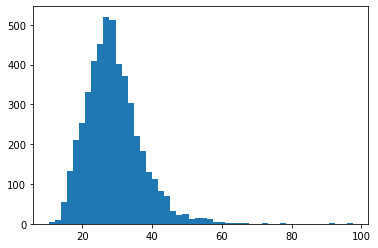

In [86]:
plt.hist(df.bmi, 50)

What to do with NA ?

Delete rows 

Impute mean/median value 

Impute previous value / next value (for time series or ordered data)

Interpolation 

Build a ML model to predict NA values

In [87]:
#We make the arbitrary choice to impute mean value
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

# Remove variables with no information 

without any more details, 'id' column is not needed for the analysis, we remove the column

In [88]:
df = df.drop('id', axis = 'columns')

# Feature scaling

standardization vs normalization

Normalization rescales the values into a range of [0,1]. 

formula = (X - Xmin) / (Xmax - Xmin)

Standardization rescales data to have a mean of 0 and a standard deviation of 1 (unit variance).

formula = (X - mean) / sd

We apply normalization on columns 'age', 'avg_glucose_level' and 'bmi'

In [89]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
columns = ['age', 'avg_glucose_level', 'bmi']
df[columns] = scaler.fit_transform(df[columns])

# Binary Encoder

We will change binary columns into 0/1 columns : ever_married (yes = 1), Residence_type (urban = 1)

In [90]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder= LabelEncoder()
df.ever_married = Label_Encoder.fit_transform(df.ever_married)

In [91]:
df.Residence_type = Label_Encoder.fit_transform(df.Residence_type)

In [104]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,0.816895,0,1,1,Private,1,0.801265,0.301260,formerly smoked,1
1,Female,0.743652,0,0,1,Self-employed,0,0.679023,0.212981,never smoked,1
2,Male,0.975586,0,1,1,Private,0,0.234512,0.254296,never smoked,1
3,Female,0.597168,0,0,1,Private,1,0.536008,0.276060,smokes,1
4,Female,0.963379,1,0,1,Self-employed,0,0.549349,0.156930,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,0.975586,1,0,1,Private,1,0.132167,0.212981,never smoked,0
5106,Female,0.987793,0,0,1,Self-employed,1,0.323516,0.340206,never smoked,0
5107,Female,0.426270,0,0,1,Self-employed,0,0.128658,0.232532,never smoked,0
5108,Male,0.621582,0,0,1,Private,0,0.513203,0.175258,formerly smoked,0


for gender, work type and smoking_status

In [115]:
# One-hot encode the categorical variables while retaining column names
X_encoded = pd.get_dummies(df, columns=['gender', 'work_type', 'smoking_status'])

In [117]:
df2 = X_encoded

# Data analysis

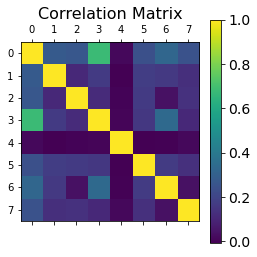

In [52]:
#8 numerical variable 
plt.matshow(df.corr())
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.show()

Age is positively correlated with ever_married

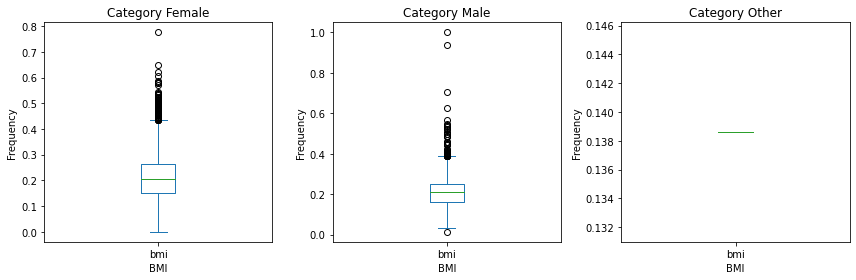

In [56]:
grouped = df.groupby('gender')

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Iterate through the subplots and plot 'bmi' for each category
for i, (category, group) in enumerate(grouped):
    ax = axes[i]
    group['bmi'].plot(kind='box', ax=ax, title=f'Category {category}')
    ax.set_xlabel('BMI')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

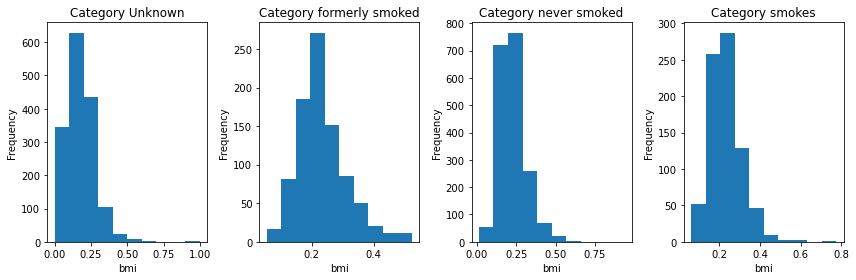

In [55]:
grouped = df.groupby('smoking_status')

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))

# Iterate through the subplots and plot 'bmi' for each category
for i, (category, group) in enumerate(grouped):
    ax = axes[i]
    group['bmi'].plot(kind='hist', ax=ax, title=f'Category {category}')
    ax.set_xlabel('bmi')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

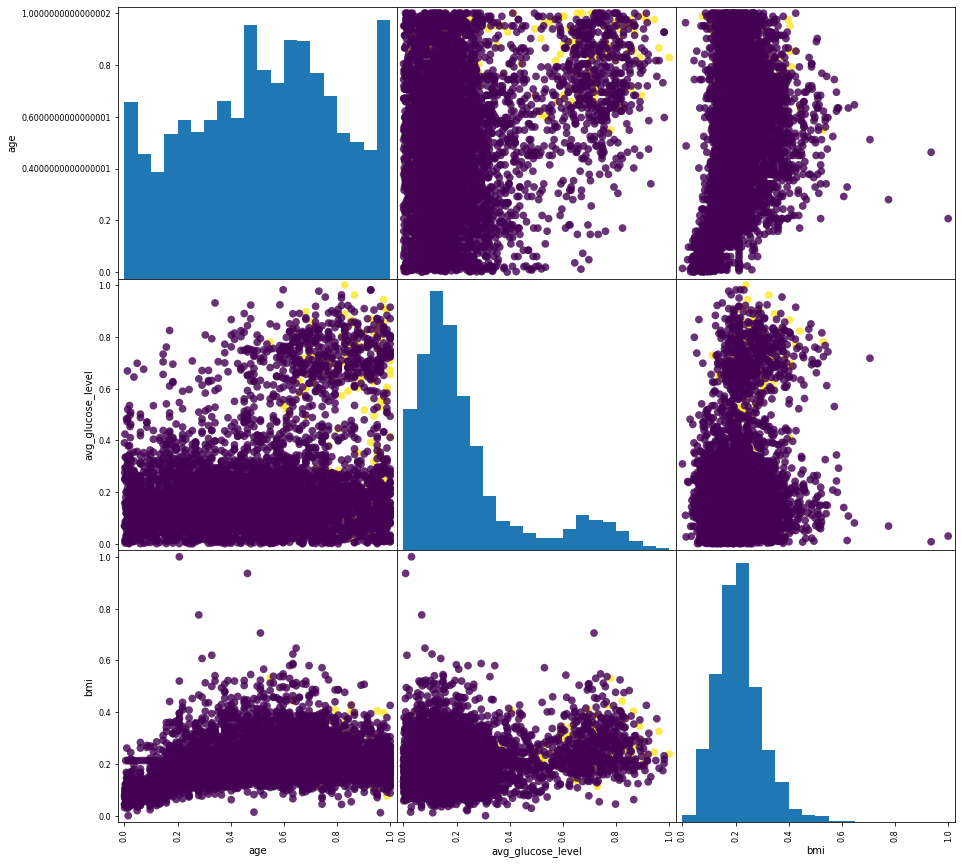

In [37]:
grr = pd.plotting.scatter_matrix(df[['age', 'avg_glucose_level', 'bmi']], c=df.stroke, figsize=(15, 15), marker='o',
hist_kwds={'bins': 20}, s=60, alpha=.8)

# Imbalance dataset

In [65]:
df.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

([<matplotlib.patches.Wedge at 0x7ff949000b80>,
 [Text(-1.0871361453364168, 0.16773491438301513, ''),
  Text(1.087136143373357, -0.16773492710614463, '')])

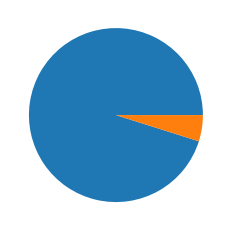

In [66]:
fig, ax = plt.subplots()
ax.pie(df.stroke.value_counts())

We do an under sampling

In [69]:
!pip install imblearn

     |████████████████████████████████| 235 kB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 302 kB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 17.7 MB 123 kB/s  eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.1
    Uninstalling numpy-1.26.1:
      Successfully uninstalled numpy-1.26.1
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
tensorflow 2.14.0 requires numpy>=1.23.5, but you have numpy 1.22.4 which is incompatible.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.22.4 which is incompatible.


In [70]:
from imblearn.under_sampling import RandomUnderSampler

In [118]:
y = df2.stroke
X = df2.drop('stroke', axis = 'columns')

under = RandomUnderSampler(random_state=42)
Xnew, ynew = under.fit_resample(X, y)

the dataset has been reduced to 498 rows

# ML Modeling

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xnew, ynew, test_size=0.2, random_state=10)

Which model to use ?

Naive Bayes

Logistic Regression

K-Nearest Neighbours

Support Vector Machine

Decision Tree

# Logistic Regression

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion)

Accuracy: 0.80
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.71      0.77        48
           1       0.77      0.88      0.82        52

    accuracy                           0.80       100
   macro avg       0.81      0.80      0.80       100
weighted avg       0.81      0.80      0.80       100

Confusion Matrix:
 [[34 14]
 [ 6 46]]


# Naive Bayes

In [125]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [126]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion)

Accuracy: 0.60
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.19      0.31        48
           1       0.57      0.98      0.72        52

    accuracy                           0.60       100
   macro avg       0.73      0.58      0.51       100
weighted avg       0.73      0.60      0.52       100

Confusion Matrix:
 [[ 9 39]
 [ 1 51]]


# KNN

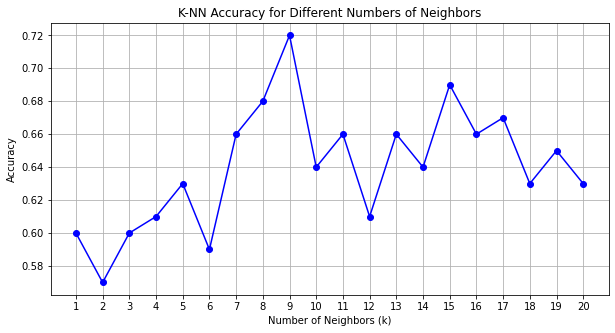

In [127]:
from sklearn.neighbors import KNeighborsClassifier


k_values = range(1, 21)  
accuracy_values = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracy_values, marker='o', linestyle='-', color='b')
plt.title('K-NN Accuracy for Different Numbers of Neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

k = 9 is best 

# Ranfom Forest

In [130]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion)

Accuracy: 0.76
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.71      0.74        48
           1       0.75      0.81      0.78        52

    accuracy                           0.76       100
   macro avg       0.76      0.76      0.76       100
weighted avg       0.76      0.76      0.76       100

Confusion Matrix:
 [[34 14]
 [10 42]]
